The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [6]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Start coding here!
nobel = pd.read_csv('C:\\Users\\reich\\Downloads\\datacamp-associate-data-scientist\\6PROJETO - Visualizando a história de vencedores do Prêmio Nobel\\nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


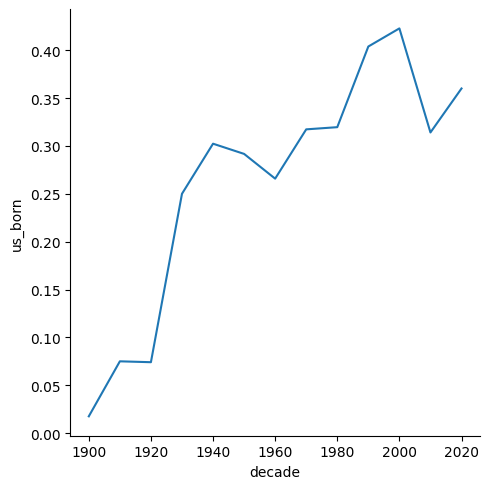

In [7]:
nobel['us_born'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

grouped = nobel.groupby('decade')['us_born'].mean().reset_index()
max_decade_usa = grouped[grouped['us_born'] == grouped['us_born'].max()]
max_decade_usa = max_decade_usa['decade'].values[0]
# max_decade_usa

sns.relplot(x='decade', y='us_born', data=grouped, kind='line')
plt.show()

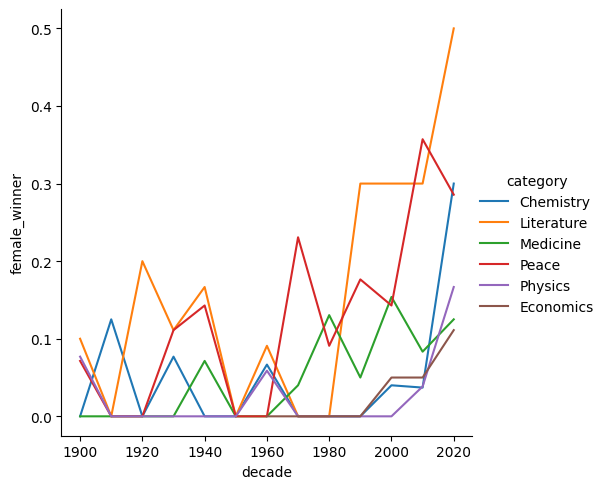

In [8]:
nobel['female_winner'] = nobel['sex'] == 'Female'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
# nobel.head()

grouped = nobel.groupby(['decade', 'category'])['female_winner'].mean().reset_index()
# grouped
grouped_max = grouped[grouped['female_winner'] == grouped['female_winner'].max()]
decade_and_category = grouped_max[['decade', 'category']]
# decade_and_category

max_female_dict = {
    decade_and_category['decade'].values[0]: decade_and_category['category'].values[0]
}
# print(max_female_dict)

sns.relplot(x='decade', y='female_winner', data=grouped, kind='line', hue='category')
plt.show()

In [9]:
girlbosses_only = nobel[nobel['female_winner'] == True]
min_row = girlbosses_only[girlbosses_only['year'] == girlbosses_only['year'].min()]
# min_row
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]

In [5]:
the_names = nobel['full_name'].value_counts()
repeat = the_names[the_names > 1].index
repeat_list = list(repeat)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Linus Carl Pauling']